In [ ]:
"""
===================================================================================
SPRINT 2: EDUCATION DATA ENRICHMENT & ADVANCED ANALYSIS
===================================================================================
Project: Undergraduate Applicants Analysis 2025
Purpose: Analyze demographics, gender gaps, and geographic patterns in
         undergraduate applications to inform education policy and equity initiatives
Author: Vrajesh Shah
Date: October 2025
===================================================================================
"""

# ===================================================================================
# SECTION 1: ENVIRONMENT SETUP & LIBRARY IMPORTS
# ===================================================================================

# Standard data manipulation libraries
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical and machine learning libraries
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set visualization styles for professional output
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("All libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


All libraries imported successfully
Analysis Date: 2025-10-17 16:06:19


In [ ]:
# ===================================================================================
# SECTION 2: DATA LOADING & INITIAL EXPLORATION
# ===================================================================================

print("\n" + "="*80)
print("SECTION 2: LOADING DATASETS")
print("="*80)

# Check if running in Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
    print("\nRunning in Google Colab environment")
except ImportError:
    IN_COLAB = False
    print("\nRunning in local environment")

# Mount Google Drive if in Colab
if IN_COLAB:
    print("\nMounting Google Drive...")
    print("   (You'll need to authorize access in a popup window)")
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")

    # Set the base path to your Google Drive folder
    BASE_PATH = '/content/drive/MyDrive/Education_Data_Analysis/'

    print(f"\nLooking for files in: {BASE_PATH}")

    # List files in the directory to verify
    import os
    if os.path.exists(BASE_PATH):
        files_in_folder = os.listdir(BASE_PATH)
        print(f"Found {len(files_in_folder)} files/folders:")
        for f in files_in_folder:
            print(f"   - {f}")
    else:
        print(f"Warning: Folder not found at {BASE_PATH}")
        print("   Please update BASE_PATH to match your folder location")
else:
    BASE_PATH = './'

# Load the main applicants dataset
print("\nLoading Undergraduate Applicants Dataset...")
try:
    applicants_file = BASE_PATH + 'Dataset Undergraduate Applicants 2025 I.xlsx'
    print(f"   File path: {applicants_file}")
    df_applicants = pd.read_excel(applicants_file)
    print(f"Successfully loaded {len(df_applicants):,} applicant records")
except Exception as e:
    print(f"Error loading applicants data: {e}")
    print("\n💡 Troubleshooting tips:")
    print("   1. Check if the file name matches exactly (case-sensitive)")
    print("   2. Verify the BASE_PATH variable points to your folder")
    print("   3. Make sure you authorized Google Drive access")

    # Try to help find the file
    print("\nSearching for Excel files in your Drive...")
    import os
    i


SECTION 2: LOADING DATASETS

Running in Google Colab environment

Mounting Google Drive...
   (You'll need to authorize access in a popup window)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!

Looking for files in: /content/drive/MyDrive/Education_Data_Analysis/
Found 15 files/folders:
   - Educacion_Secundaria.csv
   - Security _cleaned.ipynb
   - Untitled0(2).ipynb
   - peru_dropout_analysis.pyinb
   - Peru_Dropout_Analysis.ipynb
   - Diccionario_0.xlsx
   - Diccionario_0.numbers
   - Python_basics.ipynb
   - Untitled0(2)(1).ipynb
   - Educacion_Primaria.csv
   - data_cleaning_report.md
   - ubigeo_ccpp.csv
   - Untitled
   - Dataset Undergraduate Applicants 2025 I.xlsx
   - Dataset_Undergraduate_Applicants_2025 I.ipynb

Loading Undergraduate Applicants Dataset...
   File path: /content/drive/MyDrive/Education_Data_Analysis/Dataset Undergraduate Applicants 2025 I.xls

In [ ]:
# ===================================================================================
# SECTION 3: DATA EXPLORATION & QUALITY ASSESSMENT
# ===================================================================================

print("\n" + "="*80)
print("SECTION 3: DATA EXPLORATION & QUALITY ASSESSMENT")
print("="*80)

# 3.1 Examine column names and data types
print("\nAPPLICANTS DATASET - COLUMN INFORMATION:")
print("-"*80)
applicants_info = pd.DataFrame({
    'Column': df_applicants.columns,
    'Data Type': df_applicants.dtypes.values,
    'Non-Null Count': df_applicants.count().values,
    'Null Count': df_applicants.isnull().sum().values,
    'Null %': (df_applicants.isnull().sum() / len(df_applicants) * 100).round(2).values
})
print(applicants_info.to_string(index=False))

# 3.2 Display first few rows
print("\nSAMPLE RECORDS (First 3 Rows):")
print("-"*80)
print(df_applicants.head(3).T)  # Transposed for better readability

# 3.3 Statistical summary for numerical columns
print("\nSTATISTICAL SUMMARY - NUMERICAL VARIABLES:")
print("-"*80)
print(df_applicants.describe())

# 3.4 Check for duplicates
duplicates = df_applicants.duplicated(subset='UUID').sum()
print(f"\nData Quality Check:")
print(f"   - Duplicate UUIDs: {duplicates}")
print(f"   - Unique Applicants: {df_applicants['UUID'].nunique():,}")



SECTION 3: DATA EXPLORATION & QUALITY ASSESSMENT

APPLICANTS DATASET - COLUMN INFORMATION:
--------------------------------------------------------------------------------
      Column Data Type  Non-Null Count  Null Count  Null %
        Date    object            1500           0     0.0
 AnioProceso     int64            1500           0     0.0
Name Process    object            1500           0     0.0
        UUID    object            1500           0     0.0
 Anius Birth     int64            1500           0     0.0
         Age     int64            1500           0     0.0
         Sex    object            1500           0     0.0
     Country    object            1500           0     0.0
      Region    object            1500           0     0.0
    Province    object            1500           0     0.0
    District    object            1500           0     0.0
     Faculty    object            1500           0     0.0
     Program    object            1500           0     0.0
 

In [ ]:
# ===================================================================================
# SECTION 4: DATA CLEANING & STANDARDIZATION
# ===================================================================================

print("\n" + "="*80)
print("SECTION 4: DATA CLEANING & STANDARDIZATION")
print("="*80)

# Create a copy for cleaning
df_clean = df_applicants.copy()

# 4.1 Standardize column names (remove spaces, lowercase)
print("\n🧹 Standardizing column names...")
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')
print("Column names standardized")
print(f"   New columns: {list(df_clean.columns)}")

# 4.2 Clean and standardize categorical variables
print("\n🧹 Cleaning categorical variables...")

# Standardize text columns - uppercase and strip whitespace
text_columns = ['sex', 'country', 'region', 'province', 'district', 'faculty', 'program', 'subsiduary', 'modality']
for col in text_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.upper()

print("Categorical variables standardized")

# 4.3 Handle dates
print("\nProcessing date fields...")
if 'date' in df_clean.columns:
    df_clean['date'] = pd.to_datetime(df_clean['date'], format='%d/%m/%Y', errors='coerce')
    print("Date column converted to datetime format")

# 4.4 Create additional derived variables
print("\n➕ Creating derived variables...")

# Age group categorization
df_clean['age_group'] = pd.cut(df_clean['age'],
                                bins=[0, 17, 19, 22, 100],
                                labels=['<18', '18-19', '20-22', '23+'])

# Create a province-district combination for unique identification
df_clean['province_district'] = df_clean['province'] + ' - ' + df_clean['district']

# Create faculty code for easier analysis
df_clean['faculty_code'] = pd.Categorical(df_clean['faculty']).codes

print("Data cleaning completed")
print(f"   - Clean dataset shape: {df_clean.shape}")
print(f"   - Total records retained: {len(df_clean):,}")

# Display sample of cleaned data
print("\nSample of cleaned data:")
print(df_clean.head(3))


SECTION 4: DATA CLEANING & STANDARDIZATION

🧹 Standardizing column names...
Column names standardized
   New columns: ['date', 'anioproceso', 'name_process', 'uuid', 'anius_birth', 'age', 'sex', 'country', 'region', 'province', 'district', 'faculty', 'program', 'subsiduary', 'modality']

🧹 Cleaning categorical variables...
Categorical variables standardized

Processing date fields...
Date column converted to datetime format

➕ Creating derived variables...
Data cleaning completed
   - Clean dataset shape: (1500, 18)
   - Total records retained: 1,500

Sample of cleaned data:
        date  anioproceso              name_process  \
0 2025-06-26         2025  2025 Admission Process I   
1 2025-06-26         2025  2025 Admission Process I   
2 2025-06-26         2025  2025 Admission Process I   

                               uuid  anius_birth  age     sex country  \
0  0001E401D2EA43E2B9006C9EE3A938DD         2007   18  FEMALE    PERU   
1  00101B01D94F4ACF8B51DFD1445F23F8         2008  

In [ ]:
# ===================================================================================
# SECTION 5: GEOGRAPHIC DATA INTEGRATION
# ===================================================================================

print("\n" + "="*80)
print("SECTION 5: GEOGRAPHIC DATA INTEGRATION")
print("="*80)

# 5.1 Prepare ubigeo data
print("\nPreparing geographic reference data...")
df_geo = df_ubigeo.copy()

# Standardize geographic names for matching
df_geo['departamento'] = df_geo['departamento'].str.strip().str.upper()
df_geo['provincia'] = df_geo['provincia'].str.strip().str.upper()
df_geo['distrito'] = df_geo['distrito'].str.strip().str.upper()

# 5.2 Merge applicants with geographic data
print("\nMerging applicants with geographic coordinates...")

# Attempt merge on region-province-district
df_enriched = df_clean.merge(
    df_geo[['departamento', 'provincia', 'distrito', 'latitude', 'longitude']].drop_duplicates(),
    left_on=['region', 'province', 'district'],
    right_on=['departamento', 'provincia', 'distrito'],
    how='left'
)

# Check merge success
merge_success = df_enriched['latitude'].notna().sum()
merge_rate = (merge_success / len(df_enriched)) * 100

print(f"Merge completed:")
print(f"   - Records with coordinates: {merge_success:,} ({merge_rate:.1f}%)")
print(f"   - Records without coordinates: {(len(df_enriched) - merge_success):,} ({(100-merge_rate):.1f}%)")

# Create merge log for unmatched records
unmatched = df_enriched[df_enriched['latitude'].isna()][['region', 'province', 'district']].drop_duplicates()
print(f"\nUnmatched locations: {len(unmatched)}")
if len(unmatched) > 0:
    print("\nSample unmatched locations:")
    print(unmatched.head(10))



SECTION 5: GEOGRAPHIC DATA INTEGRATION

Preparing geographic reference data...

Merging applicants with geographic coordinates...
Merge completed:
   - Records with coordinates: 147,950 (100.0%)
   - Records without coordinates: 1 (0.0%)

Unmatched locations: 1

Sample unmatched locations:
                    region province district
80212  (EXTRANJERO BRASIL)   BRASIL   BRASIL


In [ ]:
# ===================================================================================
# SECTION 6: DESCRIPTIVE STATISTICS & KEY METRICS
# ===================================================================================

print("\n" + "="*80)
print("SECTION 6: DESCRIPTIVE STATISTICS & KEY METRICS")
print("="*80)

# 6.1 Overall demographic breakdown
print("\n👥 DEMOGRAPHIC OVERVIEW:")
print("-"*80)

# Gender distribution
print("\nGender Distribution:")
gender_dist = df_enriched['sex'].value_counts()
gender_pct = df_enriched['sex'].value_counts(normalize=True) * 100
gender_summary = pd.DataFrame({
    'Count': gender_dist,
    'Percentage': gender_pct.round(2)
})
print(gender_summary)

# Age distribution
print("\nAge Distribution:")
age_stats = df_enriched['age'].describe()
print(age_stats)
print(f"\n   - Most common age: {df_enriched['age'].mode()[0]} years")

# Age group distribution
print("\nAge Group Distribution:")
age_group_dist = df_enriched['age_group'].value_counts().sort_index()
age_group_pct = df_enriched['age_group'].value_counts(normalize=True).sort_index() * 100
age_group_summary = pd.DataFrame({
    'Count': age_group_dist,
    'Percentage': age_group_pct.round(2)
})
print(age_group_summary)

# 6.2 Geographic distribution
print("\nGEOGRAPHIC DISTRIBUTION:")
print("-"*80)

# Top 10 regions by applicant count
print("\nTop 10 Regions by Applicant Count:")
region_dist = df_enriched['region'].value_counts().head(10)
region_pct = (df_enriched['region'].value_counts(normalize=True) * 100).head(10)
region_summary = pd.DataFrame({
    'Applicants': region_dist,
    'Percentage': region_pct.round(2)
})
print(region_summary)

# Top 10 provinces
print("\nTop 10 Provinces by Applicant Count:")
province_dist = df_enriched['province'].value_counts().head(10)
province_pct = (df_enriched['province'].value_counts(normalize=True) * 100).head(10)
province_summary = pd.DataFrame({
    'Applicants': province_dist,
    'Percentage': province_pct.round(2)
})
print(province_summary)

# 6.3 Academic program distribution
print("\n🎓 ACADEMIC DISTRIBUTION:")
print("-"*80)

# Faculty distribution
print("\nFaculty Distribution:")
faculty_dist = df_enriched['faculty'].value_counts()
faculty_pct = (df_enriched['faculty'].value_counts(normalize=True) * 100)
faculty_summary = pd.DataFrame({
    'Applicants': faculty_dist,
    'Percentage': faculty_pct.round(2)
})
print(faculty_summary)

# Top 10 programs
print("\nTop 10 Most Popular Programs:")
program_dist = df_enriched['program'].value_counts().head(10)
program_pct = (df_enriched['program'].value_counts(normalize=True) * 100).head(10)
program_summary = pd.DataFrame({
    'Applicants': program_dist,
    'Percentage': program_pct.round(2)
})
print(program_summary)



SECTION 6: DESCRIPTIVE STATISTICS & KEY METRICS

👥 DEMOGRAPHIC OVERVIEW:
--------------------------------------------------------------------------------

Gender Distribution:
        Count  Percentage
sex                      
MALE    76416       51.65
FEMALE  71535       48.35

Age Distribution:
count    147951.000000
mean         18.762205
std           2.081847
min          17.000000
25%          18.000000
50%          18.000000
75%          19.000000
max          46.000000
Name: age, dtype: float64

   - Most common age: 18 years

Age Group Distribution:
           Count  Percentage
age_group                   
<18        22929       15.50
18-19      97585       65.96
20-22      22978       15.53
23+         4459        3.01

GEOGRAPHIC DISTRIBUTION:
--------------------------------------------------------------------------------

Top 10 Regions by Applicant Count:
             Applicants  Percentage
region                             
CAJAMARCA        143054       96.69
LA LIBER

In [ ]:
# ===================================================================================
# SECTION 7: EQUITY GAP ANALYSIS
# ===================================================================================

print("\n" + "="*80)
print("SECTION 7: EQUITY GAP ANALYSIS")
print("="*80)

# 7.1 Gender Equity Gap by Region
print("\nGENDER EQUITY ANALYSIS:")
print("-"*80)

# Calculate gender distribution by region
gender_by_region = pd.crosstab(df_enriched['region'], df_enriched['sex'], normalize='index') * 100

# Calculate gender gap (Female % - Male %)
gender_gap = gender_by_region.copy()
if 'FEMALE' in gender_gap.columns and 'MALE' in gender_gap.columns:
    gender_gap['Gender_Gap'] = gender_gap['FEMALE'] - gender_gap['MALE']
    gender_gap['Female_Pct'] = gender_gap['FEMALE']
    gender_gap['Male_Pct'] = gender_gap['MALE']

    # Add applicant counts
    applicant_counts = df_enriched['region'].value_counts()
    gender_gap['Total_Applicants'] = applicant_counts

    # Sort by gender gap
    gender_gap_sorted = gender_gap[['Total_Applicants', 'Female_Pct', 'Male_Pct', 'Gender_Gap']].sort_values('Gender_Gap', ascending=False)

    print("\nGender Gap by Region (Top 10 - Most Female-Dominated):")
    print(gender_gap_sorted.head(10).round(2))

    print("\nGender Gap by Region (Top 10 - Most Male-Dominated):")
    print(gender_gap_sorted.tail(10).round(2))

    # Overall gender gap
    overall_female_pct = (df_enriched['sex'] == 'FEMALE').sum() / len(df_enriched) * 100
    overall_male_pct = (df_enriched['sex'] == 'MALE').sum() / len(df_enriched) * 100
    overall_gap = overall_female_pct - overall_male_pct

    print(f"\nOVERALL GENDER METRICS:")
    print(f"   - Female Percentage: {overall_female_pct:.2f}%")
    print(f"   - Male Percentage: {overall_male_pct:.2f}%")
    print(f"   - Gender Gap (F-M): {overall_gap:+.2f}%")

# 7.2 Gender Gap by Faculty
print("\n⚖️ GENDER DISTRIBUTION BY FACULTY:")
print("-"*80)

gender_by_faculty = pd.crosstab(df_enriched['faculty'], df_enriched['sex'])
gender_by_faculty_pct = pd.crosstab(df_enriched['faculty'], df_enriched['sex'], normalize='index') * 100

if 'FEMALE' in gender_by_faculty_pct.columns and 'MALE' in gender_by_faculty_pct.columns:
    gender_by_faculty_pct['Gender_Gap'] = gender_by_faculty_pct['FEMALE'] - gender_by_faculty_pct['MALE']
    gender_by_faculty_pct['Total'] = gender_by_faculty.sum(axis=1)

    print(gender_by_faculty_pct.round(2))

# 7.3 Age Gap Analysis by Gender
print("\nAGE DISTRIBUTION BY GENDER:")
print("-"*80)

age_by_gender = df_enriched.groupby('sex')['age'].describe()
print(age_by_gender.round(2))




SECTION 7: EQUITY GAP ANALYSIS

GENDER EQUITY ANALYSIS:
--------------------------------------------------------------------------------

Gender Gap by Region (Top 10 - Most Female-Dominated):
sex          Total_Applicants  Female_Pct  Male_Pct  Gender_Gap
region                                                         
ICA                         1      100.00      0.00      100.00
PASCO                      91      100.00      0.00      100.00
CUSCO                      86      100.00      0.00      100.00
TUMBES                     12      100.00      0.00      100.00
LIMA                       72       90.28      9.72       80.56
JUNIN                      56       89.29     10.71       78.57
LAMBAYEQUE                249       68.27     31.73       36.55
AMAZONAS                 1157       58.95     41.05       17.89
CALLAO                      2       50.00     50.00        0.00
LA LIBERTAD              1366       48.98     51.02       -2.05

Gender Gap by Region (Top 10 - Most M

In [ ]:
# ===================================================================================
# SECTION 8: ADVANCED STATISTICAL ANALYSIS
# ===================================================================================

print("\n" + "="*80)
print("SECTION 8: ADVANCED STATISTICAL ANALYSIS")
print("="*80)

# 8.1 Chi-square test for gender independence across regions
print("\nCHI-SQUARE TEST: Gender Independence Across Regions")
print("-"*80)

# Create contingency table for top 10 regions
top_regions = df_enriched['region'].value_counts().head(10).index
df_top_regions = df_enriched[df_enriched['region'].isin(top_regions)]

contingency_table = pd.crosstab(df_top_regions['region'], df_top_regions['sex'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"\nInterpretation: ", end="")
if p_value < 0.05:
    print("Gender distribution is significantly different across regions (p < 0.05)")
else:
    print("No significant difference in gender distribution across regions (p >= 0.05)")

# 8.2 Correlation analysis
print("\nCORRELATION ANALYSIS:")
print("-"*80)

# Create numerical features for correlation
df_corr = df_enriched.copy()
df_corr['sex_numeric'] = (df_corr['sex'] == 'FEMALE').astype(int)  # 1=Female, 0=Male

# Count applicants by region
region_counts = df_corr['region'].value_counts().to_dict()
df_corr['region_applicant_count'] = df_corr['region'].map(region_counts)

# Create correlation matrix
corr_features = ['age', 'sex_numeric', 'region_applicant_count', 'faculty_code']
corr_matrix = df_corr[corr_features].corr()

print("\nCorrelation Matrix:")
print(corr_matrix.round(3))



SECTION 8: ADVANCED STATISTICAL ANALYSIS

CHI-SQUARE TEST: Gender Independence Across Regions
--------------------------------------------------------------------------------
Chi-square statistic: 800.1528
P-value: 0.0000
Degrees of freedom: 9

Interpretation: Gender distribution is significantly different across regions (p < 0.05)

CORRELATION ANALYSIS:
--------------------------------------------------------------------------------

Correlation Matrix:
                          age  sex_numeric  region_applicant_count  \
age                     1.000       -0.111                  -0.125   
sex_numeric            -0.111        1.000                   0.006   
region_applicant_count -0.125        0.006                   1.000   
faculty_code           -0.001        0.079                   0.054   

                        faculty_code  
age                           -0.001  
sex_numeric                    0.079  
region_applicant_count         0.054  
faculty_code                   1.

In [ ]:
# ===================================================================================
# SECTION 9: OUTLIER DETECTION & ANALYSIS
# ===================================================================================

print("\n" + "="*80)
print("SECTION 9: OUTLIER DETECTION & ANALYSIS")
print("="*80)

# 9.1 Age outliers
print("\nAGE OUTLIERS:")
print("-"*80)

Q1_age = df_enriched['age'].quantile(0.25)
Q3_age = df_enriched['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_lower = Q1_age - 1.5 * IQR_age
age_upper = Q3_age + 1.5 * IQR_age

age_outliers = df_enriched[(df_enriched['age'] < age_lower) | (df_enriched['age'] > age_upper)]
print(f"Outlier thresholds: [{age_lower:.1f}, {age_upper:.1f}]")
print(f"Number of age outliers: {len(age_outliers)} ({len(age_outliers)/len(df_enriched)*100:.2f}%)")

if len(age_outliers) > 0:
    print(f"\nAge outlier distribution:")
    print(age_outliers['age'].value_counts().sort_index())

# 9.2 Geographic concentration outliers
print("\nGEOGRAPHIC CONCENTRATION ANALYSIS:")
print("-"*80)

# Identify regions with unusually high or low applicant counts
region_stats = df_enriched['region'].value_counts()
mean_applicants = region_stats.mean()
std_applicants = region_stats.std()

high_concentration = region_stats[region_stats > mean_applicants + 2 * std_applicants]
low_concentration = region_stats[region_stats < mean_applicants - 2 * std_applicants]

print(f"Mean applicants per region: {mean_applicants:.1f}")
print(f"Std deviation: {std_applicants:.1f}")

if len(high_concentration) > 0:
    print(f"\nRegions with HIGH concentration (>2 SD above mean):")
    print(high_concentration)

if len(low_concentration) > 0:
    print(f"\nRegions with LOW concentration (<2 SD below mean):")
    print(low_concentration)



SECTION 9: OUTLIER DETECTION & ANALYSIS

AGE OUTLIERS:
--------------------------------------------------------------------------------
Outlier thresholds: [16.5, 20.5]
Number of age outliers: 14950 (10.10%)

Age outlier distribution:
age
21    6683
22    3808
23     874
24     973
25     594
26     126
27     341
28     179
29     409
30     126
31     203
33     128
34      68
37     312
46     126
Name: count, dtype: int64

GEOGRAPHIC CONCENTRATION ANALYSIS:
--------------------------------------------------------------------------------
Mean applicants per region: 8703.0
Std deviation: 34623.8

Regions with HIGH concentration (>2 SD above mean):
region
CAJAMARCA    143054
Name: count, dtype: int64



SECTION 10: CREATING ADVANCED VISUALIZATIONS

Creating Visualization 1: Gender Distribution Overview...
Saved: viz_01_gender_distribution.png


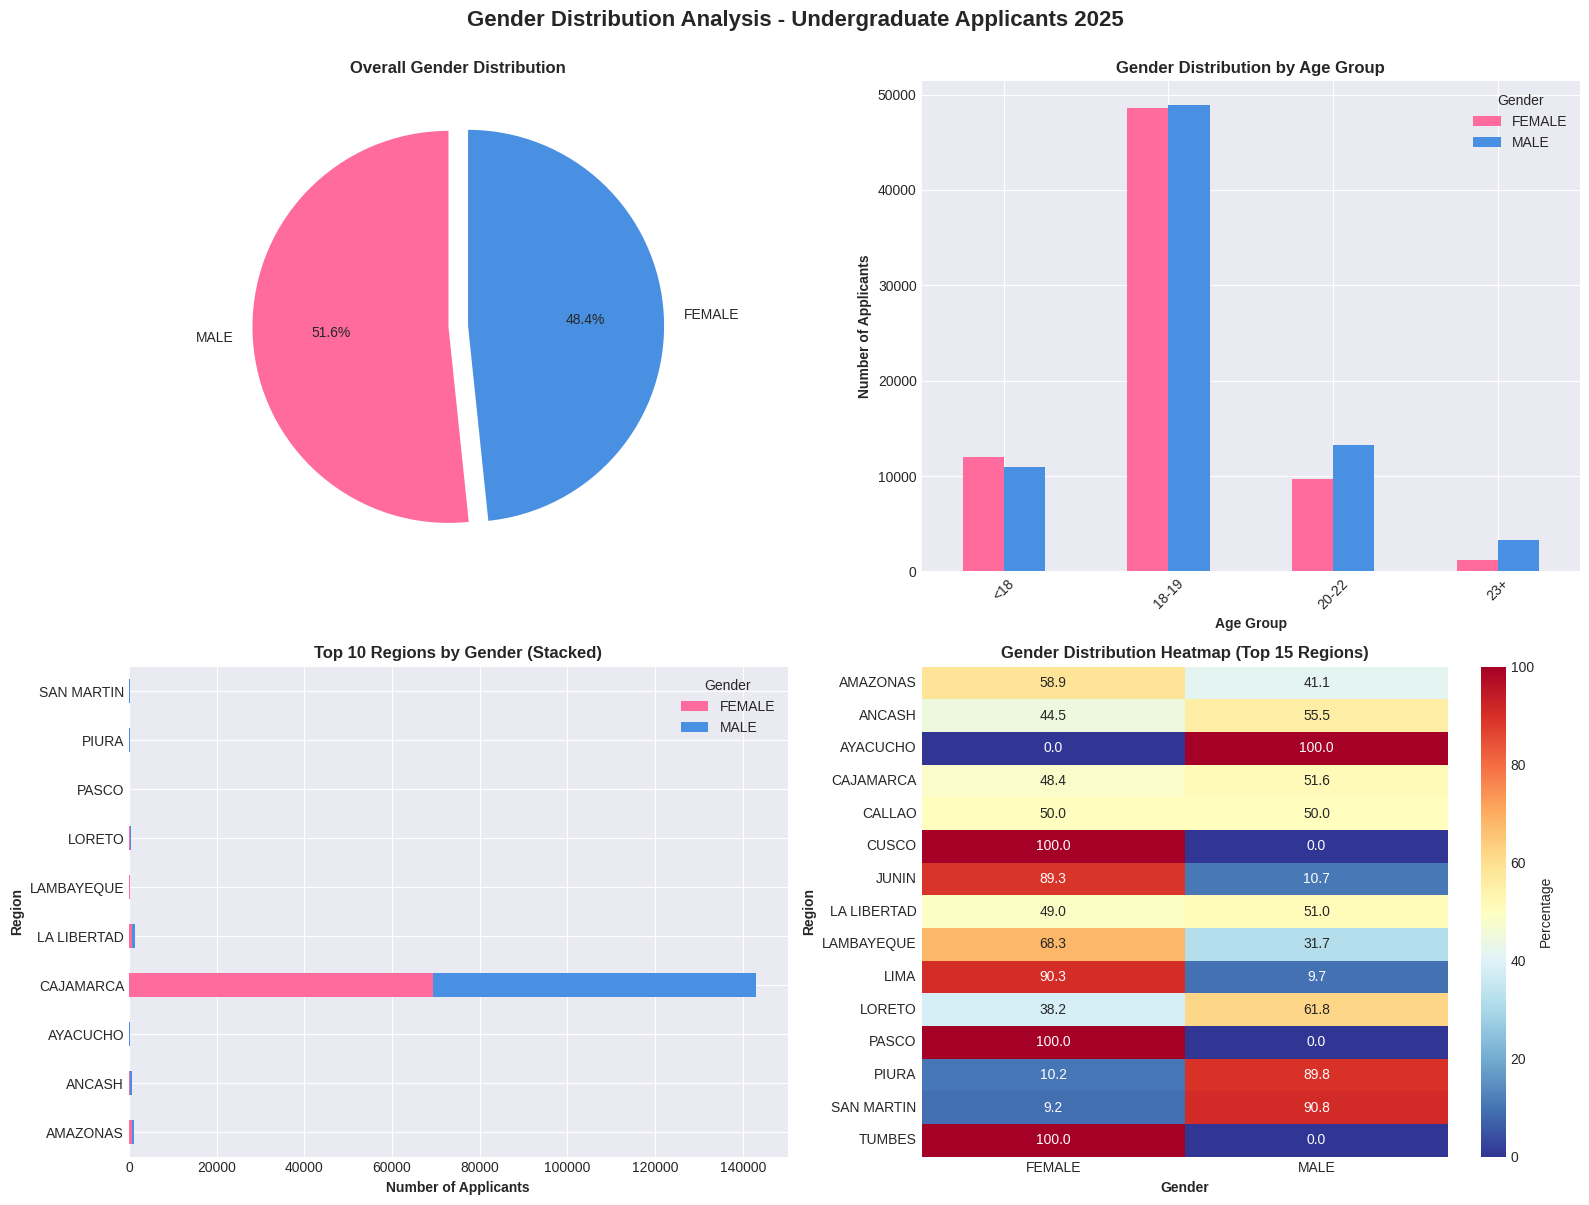


Creating Visualization 2: Faculty & Program Distribution...
Saved: viz_02_academic_distribution.png


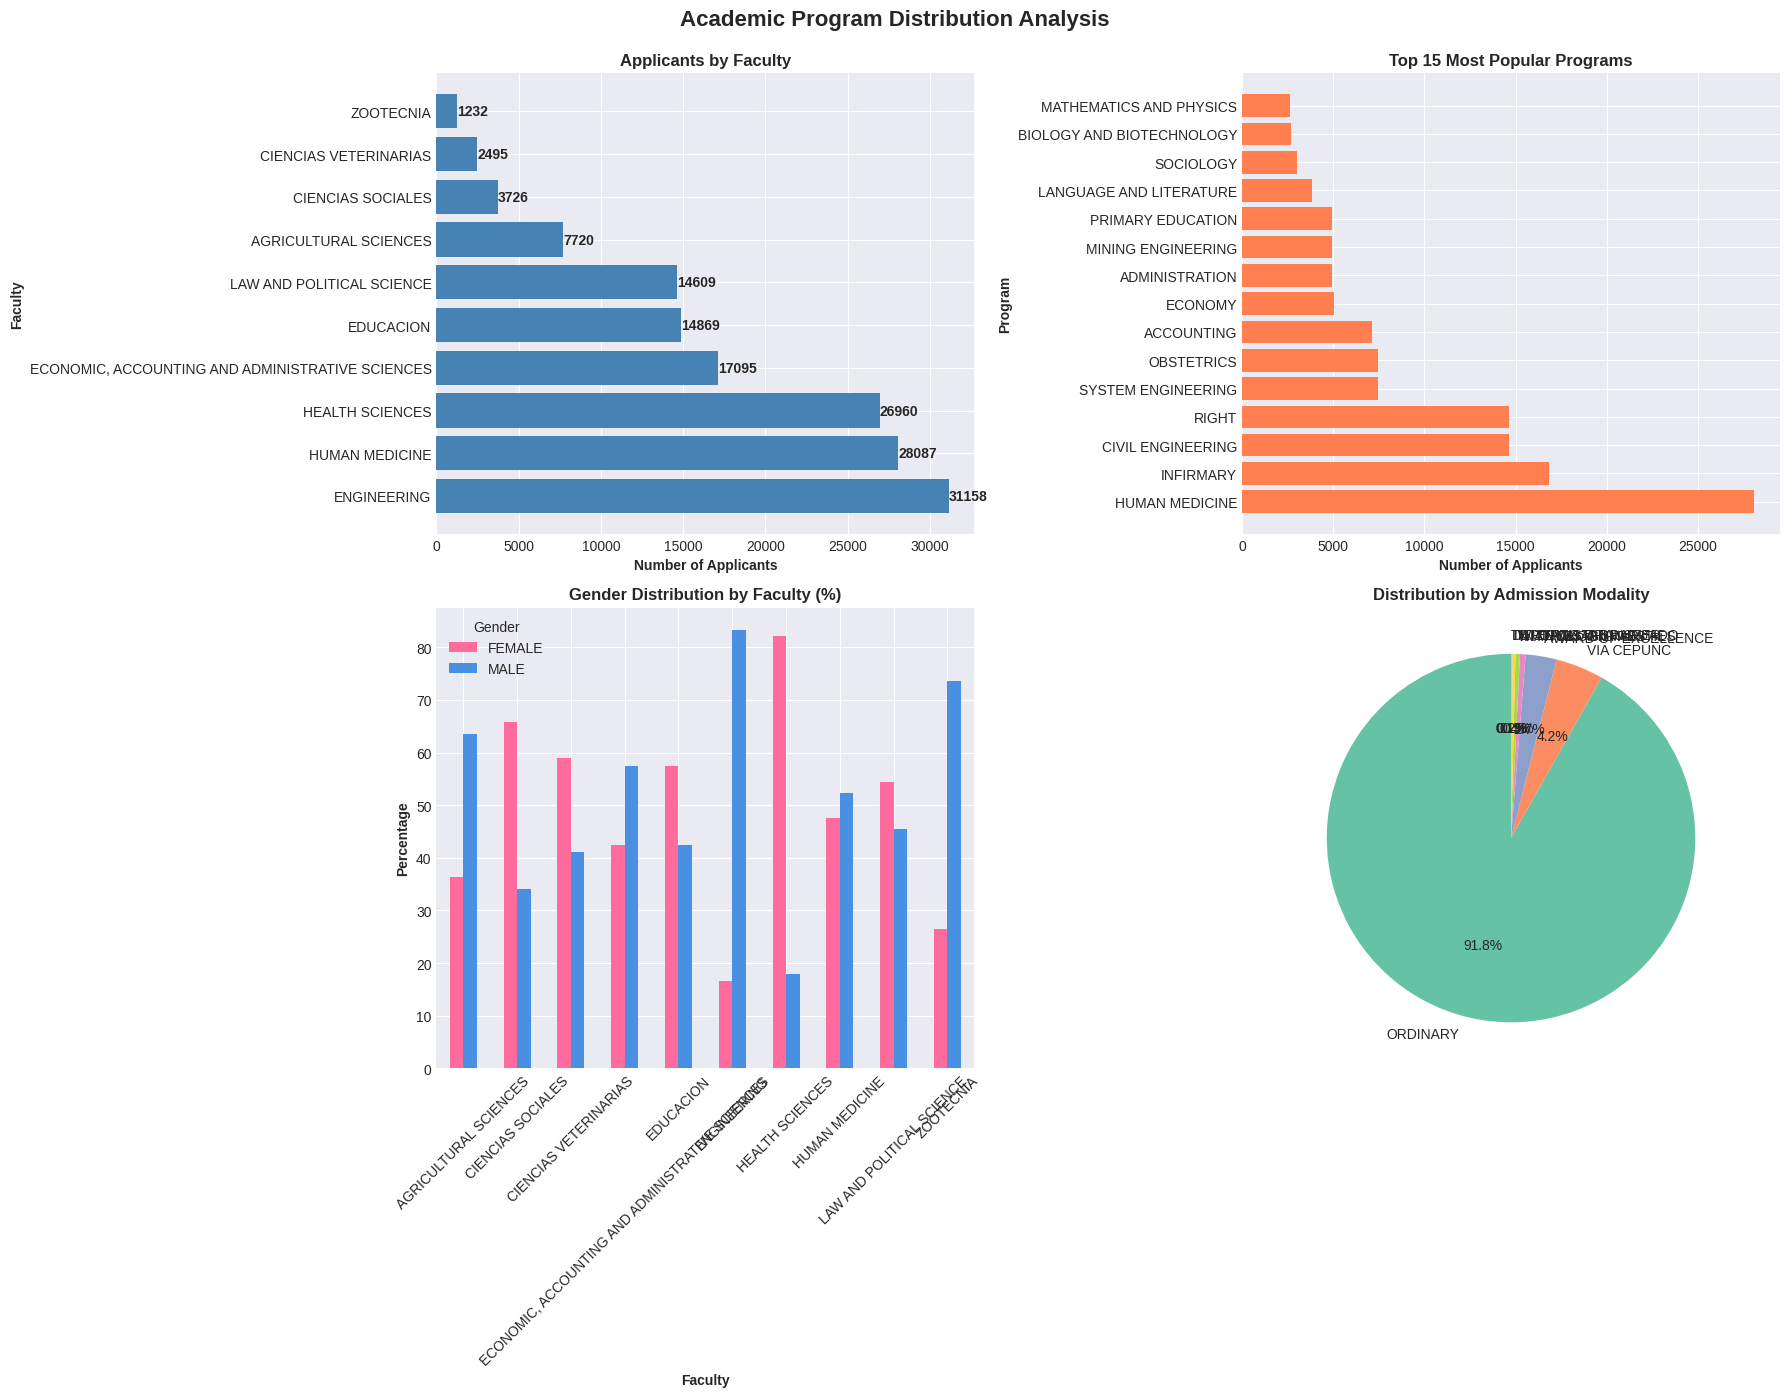


Creating Visualization 3: Geographic Distribution...
Saved: viz_03_geographic_map.html



Creating Visualization 4: Regional Gender Gap Analysis...
Saved: viz_04_regional_gender_gap.png


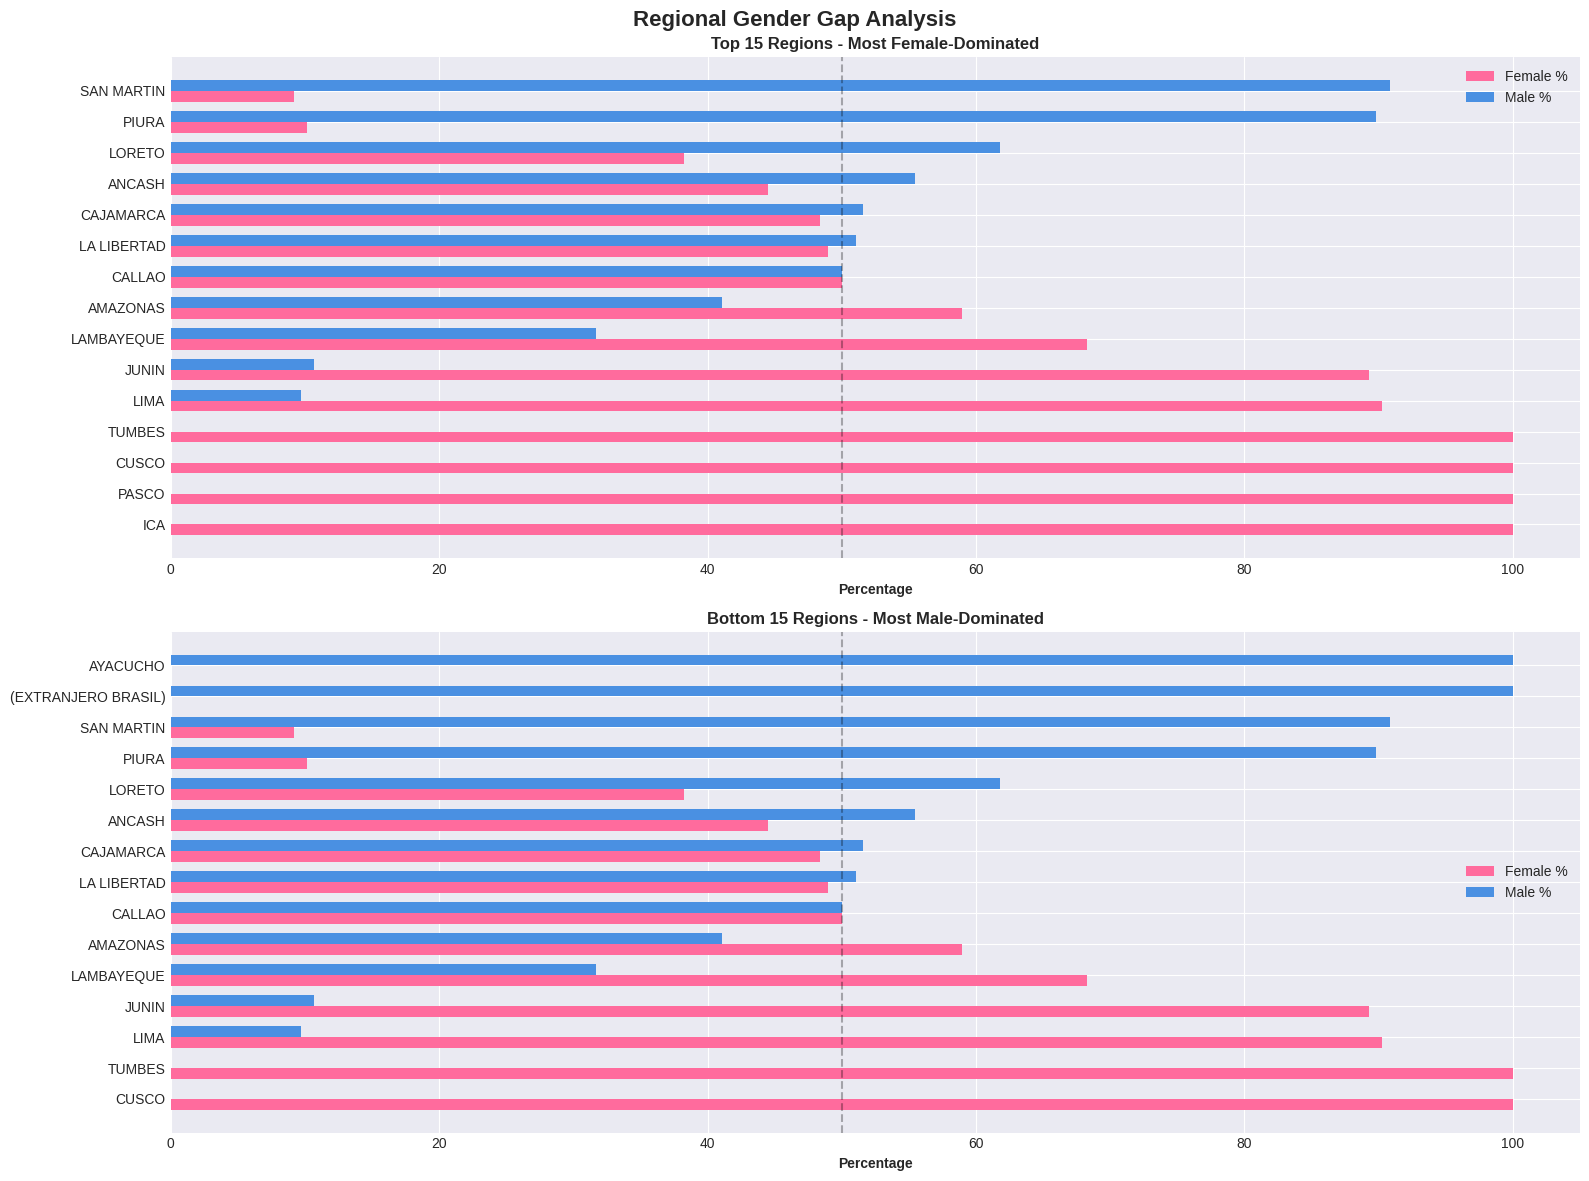


Creating Visualization 5: Age Distribution Analysis...
Saved: viz_05_age_distribution.png


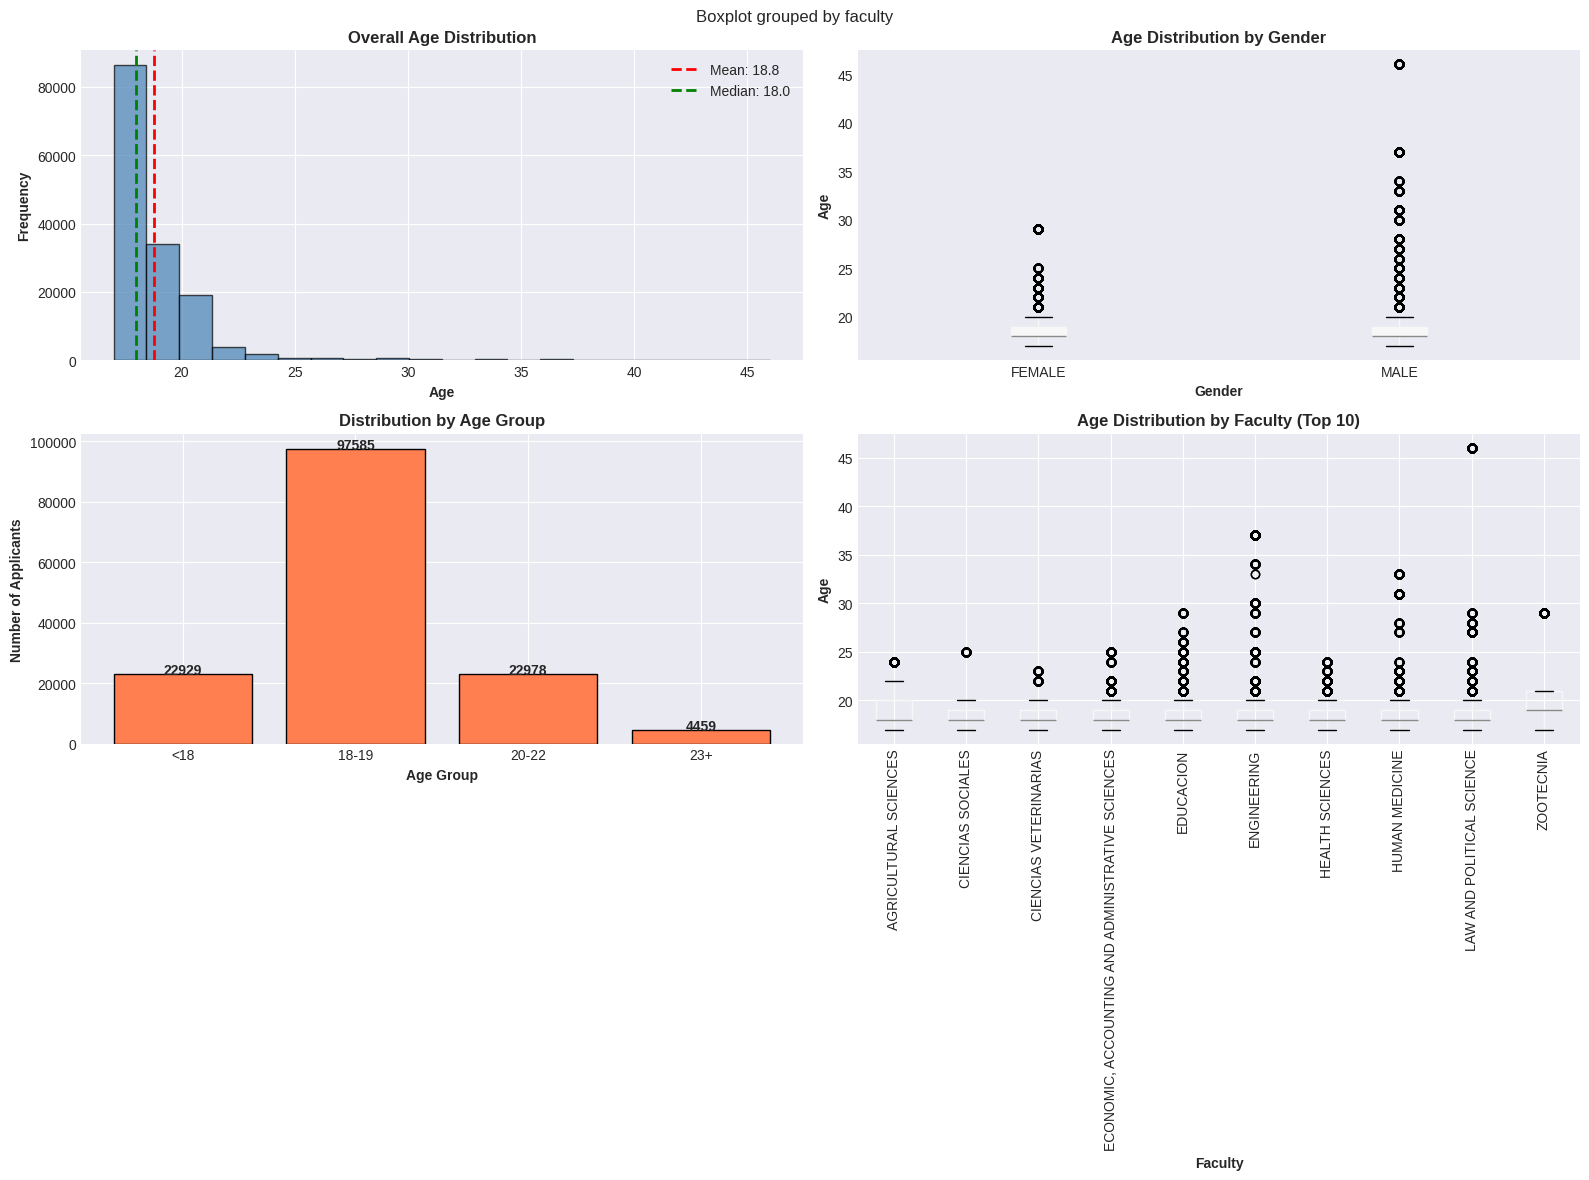


Creating Visualization 6: Correlation Analysis...
Saved: viz_06_correlation_heatmap.png


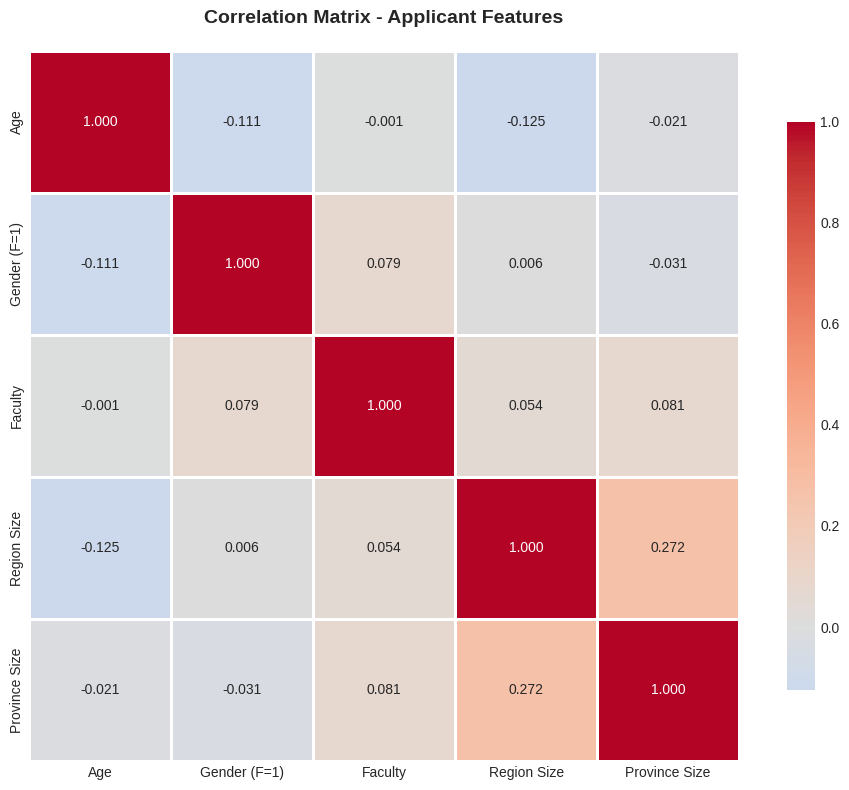


Creating Visualization 7: Regional Density Analysis...
Saved: viz_07_regional_density.png


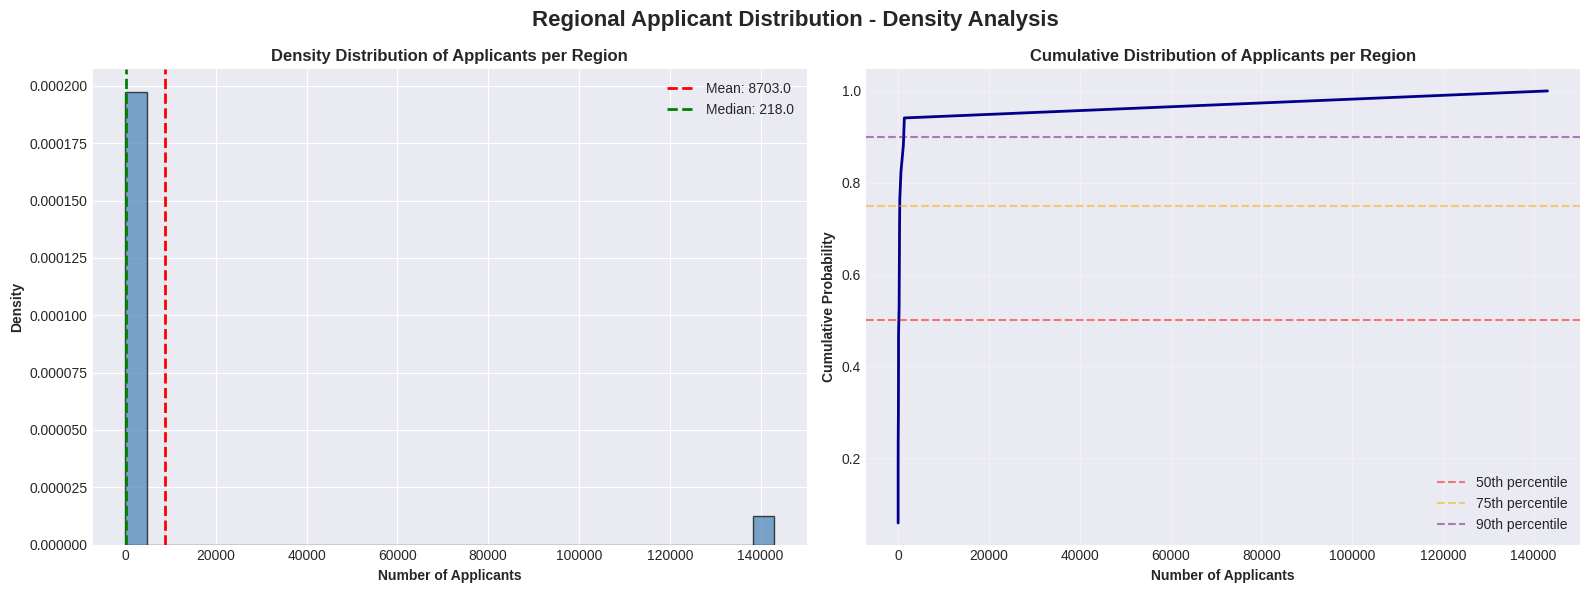


Creating Visualization 8: Decile Comparison Analysis...
Saved: viz_08_decile_comparison.png


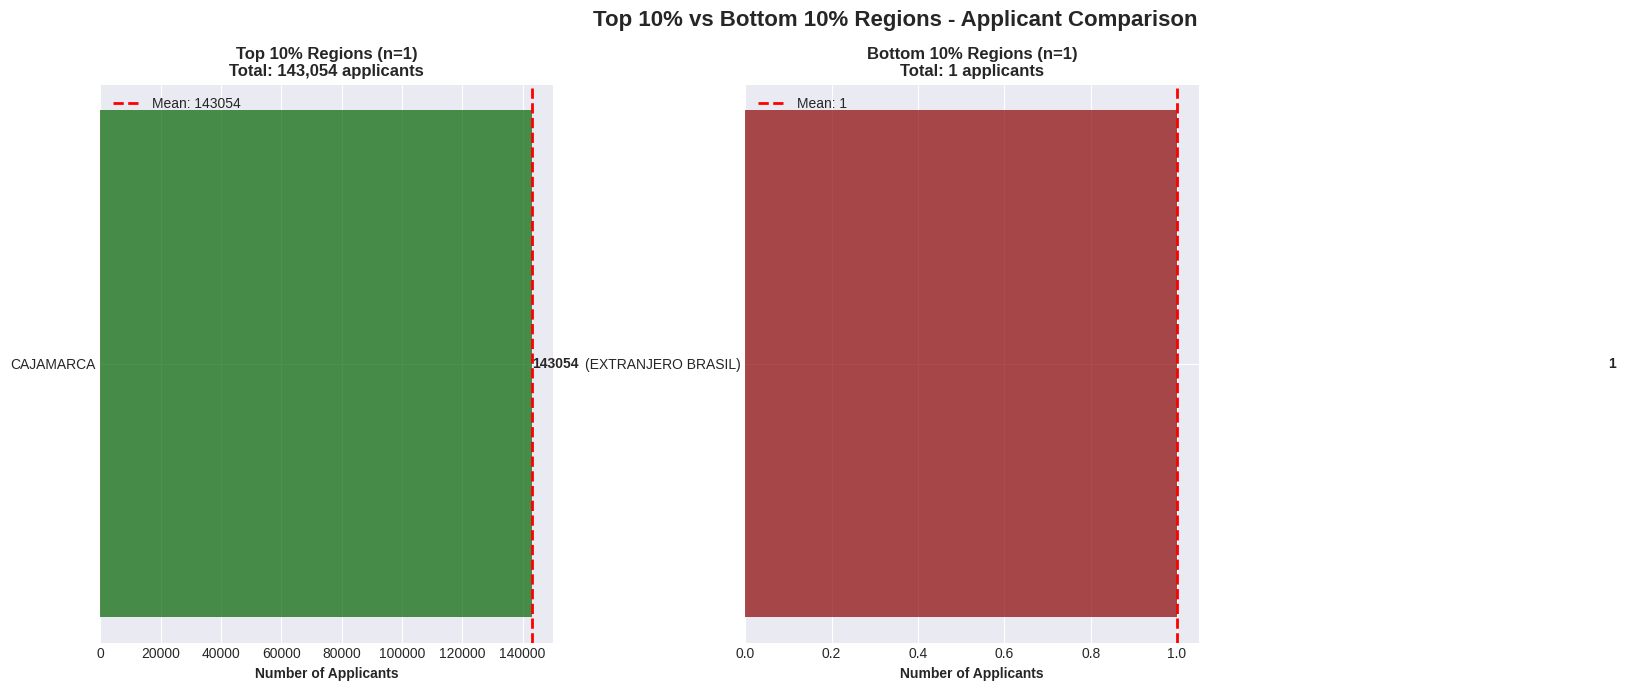


DECILE GAP METRICS:
--------------------------------------------------------------------------------
Top 10% Regions:
   - Average applicants: 143054.0
   - Total applicants: 143,054
   - Share of total: 96.7%

Bottom 10% Regions:
   - Average applicants: 1.0
   - Total applicants: 1
   - Share of total: 0.0%

Decile Gap:
   - Average difference: 143053.0 applicants
   - Ratio (top/bottom): 143054.00x

Creating Visualization 9: Application Trends...
Saved: viz_09_time_trends.png


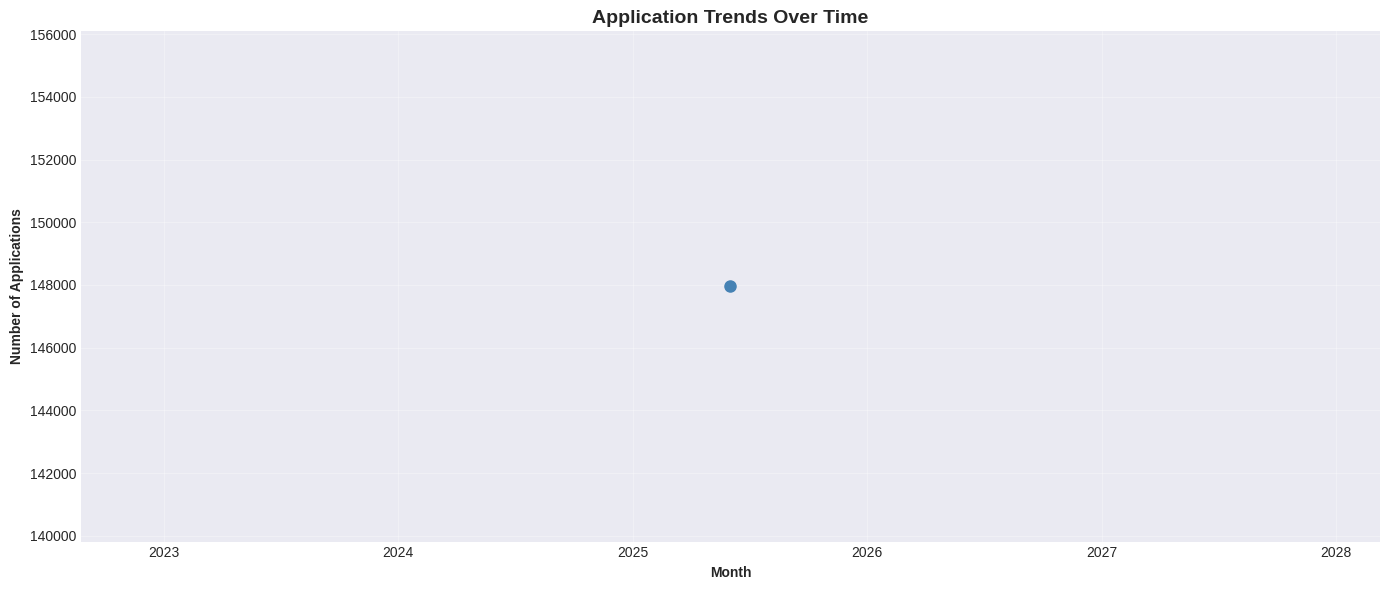


Creating Visualization 10: Clustering Analysis...
Saved: viz_10_clustering_analysis.png


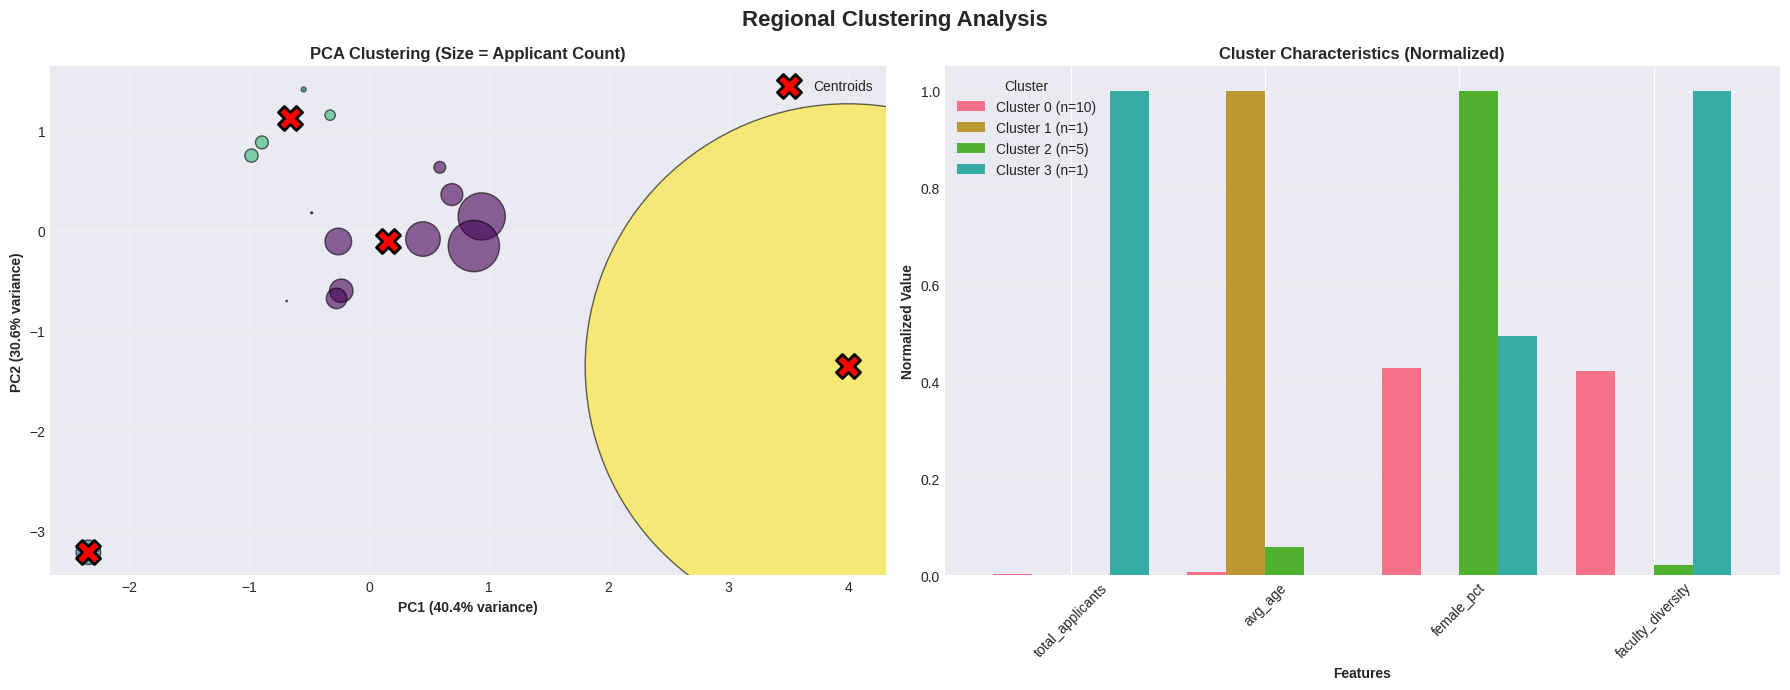


CLUSTER PROFILES:
--------------------------------------------------------------------------------

Cluster 0 (10 regions):
   - Avg Applicants: 433.9
   - Avg Age: 18.86
   - Avg Female %: 41.9%
   - Avg Faculty Diversity: 4.8
   - Sample regions: (EXTRANJERO BRASIL), AMAZONAS, ANCASH, CALLAO, LA LIBERTAD

Cluster 1 (1 regions):
   - Avg Applicants: 312.0
   - Avg Age: 37.00
   - Avg Female %: 0.0%
   - Avg Faculty Diversity: 1.0
   - Sample regions: AYACUCHO

Cluster 2 (5 regions):
   - Avg Applicants: 49.2
   - Avg Age: 19.78
   - Avg Female %: 97.9%
   - Avg Faculty Diversity: 1.2
   - Sample regions: CUSCO, ICA, JUNIN, PASCO, TUMBES

Cluster 3 (1 regions):
   - Avg Applicants: 143054.0
   - Avg Age: 18.71
   - Avg Female %: 48.4%
   - Avg Faculty Diversity: 10.0
   - Sample regions: CAJAMARCA


In [ ]:
# ===================================================================================
# SECTION 10: VISUALIZATION DELIVERABLES
# ===================================================================================

print("\n" + "="*80)
print("SECTION 10: CREATING ADVANCED VISUALIZATIONS")
print("="*80)

# Set up the matplotlib figure style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# 10.1 Gender Distribution Overview
print("\nCreating Visualization 1: Gender Distribution Overview...")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Gender Distribution Analysis - Undergraduate Applicants 2025',
             fontsize=16, fontweight='bold', y=1.00)

# Subplot 1: Overall gender distribution
if 'FEMALE' in gender_dist.index and 'MALE' in gender_dist.index:
    colors = ['#FF6B9D', '#4A90E2']
    axes[0, 0].pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%',
                   startangle=90, colors=colors, explode=(0.05, 0.05))
    axes[0, 0].set_title('Overall Gender Distribution', fontsize=12, fontweight='bold')

# Subplot 2: Gender distribution by age group
age_gender = pd.crosstab(df_enriched['age_group'], df_enriched['sex'])
age_gender.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_title('Gender Distribution by Age Group', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Age Group', fontweight='bold')
axes[0, 1].set_ylabel('Number of Applicants', fontweight='bold')
axes[0, 1].legend(title='Gender')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Top 10 regions by gender
top_10_regions = df_enriched['region'].value_counts().head(10).index
df_top_10 = df_enriched[df_enriched['region'].isin(top_10_regions)]
region_gender = pd.crosstab(df_top_10['region'], df_top_10['sex'])
region_gender.plot(kind='barh', ax=axes[1, 0], stacked=True, color=colors)
axes[1, 0].set_title('Top 10 Regions by Gender (Stacked)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Applicants', fontweight='bold')
axes[1, 0].set_ylabel('Region', fontweight='bold')
axes[1, 0].legend(title='Gender')

# Subplot 4: Gender gap heatmap (top 15 regions)
top_15_regions = df_enriched['region'].value_counts().head(15).index
df_top_15 = df_enriched[df_enriched['region'].isin(top_15_regions)]
gender_pct = pd.crosstab(df_top_15['region'], df_top_15['sex'], normalize='index') * 100
sns.heatmap(gender_pct, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=axes[1, 1],
            cbar_kws={'label': 'Percentage'})
axes[1, 1].set_title('Gender Distribution Heatmap (Top 15 Regions)',
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Gender', fontweight='bold')
axes[1, 1].set_ylabel('Region', fontweight='bold')

plt.tight_layout()
plt.savefig('viz_01_gender_distribution.png', dpi=300, bbox_inches='tight')
print("Saved: viz_01_gender_distribution.png")
plt.show()

# 10.2 Faculty & Program Analysis
print("\nCreating Visualization 2: Faculty & Program Distribution...")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Academic Program Distribution Analysis',
             fontsize=16, fontweight='bold', y=0.995)

# Subplot 1: Faculty distribution
faculty_counts = df_enriched['faculty'].value_counts()
axes[0, 0].barh(faculty_counts.index, faculty_counts.values, color='steelblue')
axes[0, 0].set_title('Applicants by Faculty', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Applicants', fontweight='bold')
axes[0, 0].set_ylabel('Faculty', fontweight='bold')

# Add value labels
for i, v in enumerate(faculty_counts.values):
    axes[0, 0].text(v + 10, i, str(v), va='center', fontweight='bold')

# Subplot 2: Top 15 programs
top_programs = df_enriched['program'].value_counts().head(15)
axes[0, 1].barh(top_programs.index, top_programs.values, color='coral')
axes[0, 1].set_title('Top 15 Most Popular Programs', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Applicants', fontweight='bold')
axes[0, 1].set_ylabel('Program', fontweight='bold')

# Subplot 3: Gender distribution by faculty
faculty_gender = pd.crosstab(df_enriched['faculty'], df_enriched['sex'], normalize='index') * 100
faculty_gender.plot(kind='bar', ax=axes[1, 0], color=['#FF6B9D', '#4A90E2'])
axes[1, 0].set_title('Gender Distribution by Faculty (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Faculty', fontweight='bold')
axes[1, 0].set_ylabel('Percentage', fontweight='bold')
axes[1, 0].legend(title='Gender')
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Modality distribution
modality_counts = df_enriched['modality'].value_counts()
axes[1, 1].pie(modality_counts, labels=modality_counts.index, autopct='%1.1f%%',
               startangle=90, colors=sns.color_palette('Set2', len(modality_counts)))
axes[1, 1].set_title('Distribution by Admission Modality', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('viz_02_academic_distribution.png', dpi=300, bbox_inches='tight')
print("Saved: viz_02_academic_distribution.png")
plt.show()

# 10.3 Geographic Distribution Maps
print("\nCreating Visualization 3: Geographic Distribution...")

# Filter data with valid coordinates
df_with_coords = df_enriched[df_enriched['latitude'].notna() & df_enriched['longitude'].notna()].copy()

if len(df_with_coords) > 0:
    # Aggregate by location
    location_agg = df_with_coords.groupby(['region', 'province', 'district', 'latitude', 'longitude']).agg({
        'uuid': 'count',
        'sex': lambda x: (x == 'FEMALE').sum() / len(x) * 100
    }).reset_index()
    location_agg.columns = ['region', 'province', 'district', 'latitude', 'longitude',
                            'applicant_count', 'female_percentage']

    # Create interactive map using plotly
    fig = px.scatter_mapbox(location_agg,
                            lat='latitude',
                            lon='longitude',
                            size='applicant_count',
                            color='female_percentage',
                            hover_name='district',
                            hover_data={
                                'region': True,
                                'province': True,
                                'applicant_count': True,
                                'female_percentage': ':.1f',
                                'latitude': False,
                                'longitude': False
                            },
                            color_continuous_scale='RdYlBu',
                            size_max=30,
                            zoom=5,
                            title='Geographic Distribution of Applicants<br><sub>Size = Applicant Count | Color = Female %</sub>')

    fig.update_layout(
        mapbox_style='open-street-map',
        height=700,
        font=dict(size=12)
    )

    fig.write_html('viz_03_geographic_map.html')
    print("Saved: viz_03_geographic_map.html")
    fig.show()
else:
    print("⚠️ No coordinates available for mapping")

# 10.4 Regional Analysis - Gender Gap
print("\nCreating Visualization 4: Regional Gender Gap Analysis...")

# Calculate gender metrics by region
region_gender_analysis = df_enriched.groupby('region').agg({
    'uuid': 'count',
    'sex': lambda x: (x == 'FEMALE').sum() / len(x) * 100
}).reset_index()
region_gender_analysis.columns = ['region', 'total_applicants', 'female_percentage']
region_gender_analysis['male_percentage'] = 100 - region_gender_analysis['female_percentage']
region_gender_analysis['gender_gap'] = region_gender_analysis['female_percentage'] - region_gender_analysis['male_percentage']

# Sort by gender gap
region_gender_analysis = region_gender_analysis.sort_values('gender_gap', ascending=False)

# Create visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Regional Gender Gap Analysis', fontsize=16, fontweight='bold')

# Top 15 regions by gender gap (most female-dominated)
top_15 = region_gender_analysis.head(15)
x = np.arange(len(top_15))
width = 0.35

axes[0].barh(x - width/2, top_15['female_percentage'], width, label='Female %', color='#FF6B9D')
axes[0].barh(x + width/2, top_15['male_percentage'], width, label='Male %', color='#4A90E2')
axes[0].set_yticks(x)
axes[0].set_yticklabels(top_15['region'])
axes[0].set_xlabel('Percentage', fontweight='bold')
axes[0].set_title('Top 15 Regions - Most Female-Dominated', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].axvline(x=50, color='black', linestyle='--', alpha=0.3)

# Bottom 15 regions (most male-dominated)
bottom_15 = region_gender_analysis.tail(15)
x = np.arange(len(bottom_15))

axes[1].barh(x - width/2, bottom_15['female_percentage'], width, label='Female %', color='#FF6B9D')
axes[1].barh(x + width/2, bottom_15['male_percentage'], width, label='Male %', color='#4A90E2')
axes[1].set_yticks(x)
axes[1].set_yticklabels(bottom_15['region'])
axes[1].set_xlabel('Percentage', fontweight='bold')
axes[1].set_title('Bottom 15 Regions - Most Male-Dominated', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].axvline(x=50, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('viz_04_regional_gender_gap.png', dpi=300, bbox_inches='tight')
print("Saved: viz_04_regional_gender_gap.png")
plt.show()

# 10.5 Age Distribution Analysis
print("\nCreating Visualization 5: Age Distribution Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Age Distribution Analysis', fontsize=16, fontweight='bold', y=0.995)

# Subplot 1: Overall age distribution
axes[0, 0].hist(df_enriched['age'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Overall Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].axvline(df_enriched['age'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {df_enriched["age"].mean():.1f}')
axes[0, 0].axvline(df_enriched['age'].median(), color='green', linestyle='--',
                   linewidth=2, label=f'Median: {df_enriched["age"].median():.1f}')
axes[0, 0].legend()

# Subplot 2: Age distribution by gender
df_enriched.boxplot(column='age', by='sex', ax=axes[0, 1],
                    patch_artist=True, grid=False)
axes[0, 1].set_title('Age Distribution by Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Gender', fontweight='bold')
axes[0, 1].set_ylabel('Age', fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Subplot 3: Age group distribution
age_group_counts = df_enriched['age_group'].value_counts().sort_index()
axes[1, 0].bar(age_group_counts.index, age_group_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_title('Distribution by Age Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age Group', fontweight='bold')
axes[1, 0].set_ylabel('Number of Applicants', fontweight='bold')

# Add value labels
for i, v in enumerate(age_group_counts.values):
    axes[1, 0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Subplot 4: Age distribution by top 10 faculties
top_10_faculties = df_enriched['faculty'].value_counts().head(10).index
df_top_faculties = df_enriched[df_enriched['faculty'].isin(top_10_faculties)]
df_top_faculties.boxplot(column='age', by='faculty', ax=axes[1, 1], rot=90)
axes[1, 1].set_title('Age Distribution by Faculty (Top 10)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Faculty', fontweight='bold')
axes[1, 1].set_ylabel('Age', fontweight='bold')

plt.tight_layout()
plt.savefig('viz_05_age_distribution.png', dpi=300, bbox_inches='tight')
print("Saved: viz_05_age_distribution.png")
plt.show()

# 10.6 Correlation Heatmap
print("\nCreating Visualization 6: Correlation Analysis...")

# Prepare numerical features for correlation
df_corr_viz = df_enriched.copy()
df_corr_viz['sex_numeric'] = (df_corr_viz['sex'] == 'FEMALE').astype(int)
df_corr_viz['faculty_numeric'] = pd.Categorical(df_corr_viz['faculty']).codes

# Count by categorical variables
region_counts = df_corr_viz['region'].value_counts().to_dict()
province_counts = df_corr_viz['province'].value_counts().to_dict()
df_corr_viz['region_size'] = df_corr_viz['region'].map(region_counts)
df_corr_viz['province_size'] = df_corr_viz['province'].map(province_counts)

# Select features for correlation
corr_features = ['age', 'sex_numeric', 'faculty_numeric', 'region_size', 'province_size']
corr_data = df_corr_viz[corr_features].corr()

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=['Age', 'Gender (F=1)', 'Faculty', 'Region Size', 'Province Size'],
            yticklabels=['Age', 'Gender (F=1)', 'Faculty', 'Region Size', 'Province Size'])
ax.set_title('Correlation Matrix - Applicant Features', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('viz_06_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("Saved: viz_06_correlation_heatmap.png")
plt.show()

# 10.7 Density Plot - Regional Applicant Distribution
print("\nCreating Visualization 7: Regional Density Analysis...")

region_applicants = df_enriched['region'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Regional Applicant Distribution - Density Analysis',
             fontsize=16, fontweight='bold')

# Density plot
axes[0].hist(region_applicants.values, bins=30, density=True, alpha=0.7,
             color='steelblue', edgecolor='black')
axes[0].set_title('Density Distribution of Applicants per Region', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Applicants', fontweight='bold')
axes[0].set_ylabel('Density', fontweight='bold')
axes[0].axvline(region_applicants.mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean: {region_applicants.mean():.1f}')
axes[0].axvline(region_applicants.median(), color='green', linestyle='--',
                linewidth=2, label=f'Median: {region_applicants.median():.1f}')
axes[0].legend()

# Cumulative distribution
sorted_values = np.sort(region_applicants.values)
cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
axes[1].plot(sorted_values, cumulative, linewidth=2, color='darkblue')
axes[1].set_title('Cumulative Distribution of Applicants per Region',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Applicants', fontweight='bold')
axes[1].set_ylabel('Cumulative Probability', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(0.5, color='red', linestyle='--', alpha=0.5, label='50th percentile')
axes[1].axhline(0.75, color='orange', linestyle='--', alpha=0.5, label='75th percentile')
axes[1].axhline(0.90, color='purple', linestyle='--', alpha=0.5, label='90th percentile')
axes[1].legend()

plt.tight_layout()
plt.savefig('viz_07_regional_density.png', dpi=300, bbox_inches='tight')
print("Saved: viz_07_regional_density.png")
plt.show()

# 10.8 Decile Comparison - Top vs Bottom Regions
print("\nCreating Visualization 8: Decile Comparison Analysis...")

# Calculate deciles
region_applicant_counts = df_enriched['region'].value_counts()
n_regions = len(region_applicant_counts)
decile_size = n_regions // 10

top_decile = region_applicant_counts.head(decile_size)
bottom_decile = region_applicant_counts.tail(decile_size)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Top 10% vs Bottom 10% Regions - Applicant Comparison',
             fontsize=16, fontweight='bold')

# Top decile
axes[0].barh(range(len(top_decile)), top_decile.values, color='darkgreen', alpha=0.7)
axes[0].set_yticks(range(len(top_decile)))
axes[0].set_yticklabels(top_decile.index)
axes[0].set_xlabel('Number of Applicants', fontweight='bold')
axes[0].set_title(f'Top 10% Regions (n={len(top_decile)})\nTotal: {top_decile.sum():,} applicants',
                  fontsize=12, fontweight='bold')
axes[0].axvline(top_decile.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {top_decile.mean():.0f}')
axes[0].legend()

# Add value labels
for i, v in enumerate(top_decile.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# Bottom decile
axes[1].barh(range(len(bottom_decile)), bottom_decile.values, color='darkred', alpha=0.7)
axes[1].set_yticks(range(len(bottom_decile)))
axes[1].set_yticklabels(bottom_decile.index)
axes[1].set_xlabel('Number of Applicants', fontweight='bold')
axes[1].set_title(f'Bottom 10% Regions (n={len(bottom_decile)})\nTotal: {bottom_decile.sum():,} applicants',
                  fontsize=12, fontweight='bold')
axes[1].axvline(bottom_decile.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {bottom_decile.mean():.0f}')
axes[1].legend()

# Add value labels
for i, v in enumerate(bottom_decile.values):
    axes[1].text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('viz_08_decile_comparison.png', dpi=300, bbox_inches='tight')
print("Saved: viz_08_decile_comparison.png")
plt.show()

# Calculate and print decile gap metrics
print("\nDECILE GAP METRICS:")
print("-"*80)
print(f"Top 10% Regions:")
print(f"   - Average applicants: {top_decile.mean():.1f}")
print(f"   - Total applicants: {top_decile.sum():,}")
print(f"   - Share of total: {top_decile.sum()/len(df_enriched)*100:.1f}%")

print(f"\nBottom 10% Regions:")
print(f"   - Average applicants: {bottom_decile.mean():.1f}")
print(f"   - Total applicants: {bottom_decile.sum():,}")
print(f"   - Share of total: {bottom_decile.sum()/len(df_enriched)*100:.1f}%")

print(f"\nDecile Gap:")
print(f"   - Average difference: {top_decile.mean() - bottom_decile.mean():.1f} applicants")
print(f"   - Ratio (top/bottom): {top_decile.mean() / bottom_decile.mean():.2f}x")

# 10.9 Time Series (if applicable) - Year trends
print("\nCreating Visualization 9: Application Trends...")

# Check if we have time data
if 'date' in df_enriched.columns:
    df_enriched['year_month'] = df_enriched['date'].dt.to_period('M')

    # Applications over time
    time_series = df_enriched.groupby('year_month').size()

    fig, ax = plt.subplots(figsize=(14, 6))
    time_series.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=ax, color='steelblue')
    ax.set_title('Application Trends Over Time', fontsize=14, fontweight='bold')
    ax.set_xlabel('Month', fontweight='bold')
    ax.set_ylabel('Number of Applications', fontweight='bold')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('viz_09_time_trends.png', dpi=300, bbox_inches='tight')
    print("Saved: viz_09_time_trends.png")
    plt.show()
else:
    print("No time-series data available for trend analysis")

# 10.10 Advanced: Clustering Analysis
print("\nCreating Visualization 10: Clustering Analysis...")

# Prepare data for clustering - aggregate by region
clustering_data = df_enriched.groupby('region').agg({
    'uuid': 'count',  # Total applicants
    'age': 'mean',    # Average age
    'sex': lambda x: (x == 'FEMALE').sum() / len(x) * 100  # Female percentage
}).reset_index()
clustering_data.columns = ['region', 'total_applicants', 'avg_age', 'female_pct']

# Add more features
# Count of faculties per region
faculty_diversity = df_enriched.groupby('region')['faculty'].nunique().reset_index()
faculty_diversity.columns = ['region', 'faculty_diversity']
clustering_data = clustering_data.merge(faculty_diversity, on='region')

# Standardize features for clustering
features_for_clustering = ['total_applicants', 'avg_age', 'female_pct', 'faculty_diversity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data[features_for_clustering])

# Perform K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clustering_data['cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
clustering_data['pca1'] = X_pca[:, 0]
clustering_data['pca2'] = X_pca[:, 1]

# Create clustering visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Regional Clustering Analysis', fontsize=16, fontweight='bold')

# PCA scatter plot
scatter = axes[0].scatter(clustering_data['pca1'], clustering_data['pca2'],
                         c=clustering_data['cluster'], s=clustering_data['total_applicants'],
                         cmap='viridis', alpha=0.6, edgecolors='black', linewidth=1)
axes[0].set_title('PCA Clustering (Size = Applicant Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='red', s=300, marker='X', edgecolors='black', linewidth=2,
               label='Centroids')
axes[0].legend()

# Cluster characteristics
cluster_summary = clustering_data.groupby('cluster')[features_for_clustering].mean()
cluster_counts = clustering_data['cluster'].value_counts().sort_index()

# Bar plot of cluster characteristics (normalized)
cluster_summary_norm = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())
cluster_summary_norm.T.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Cluster Characteristics (Normalized)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Features', fontweight='bold')
axes[1].set_ylabel('Normalized Value', fontweight='bold')
axes[1].legend(title='Cluster', labels=[f'Cluster {i} (n={cluster_counts[i]})'
                                        for i in range(n_clusters)])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('viz_10_clustering_analysis.png', dpi=300, bbox_inches='tight')
print("Saved: viz_10_clustering_analysis.png")
plt.show()

# Print cluster profiles
print("\nCLUSTER PROFILES:")
print("-"*80)
for i in range(n_clusters):
    cluster_regions = clustering_data[clustering_data['cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_regions)} regions):")
    print(f"   - Avg Applicants: {cluster_regions['total_applicants'].mean():.1f}")
    print(f"   - Avg Age: {cluster_regions['avg_age'].mean():.2f}")
    print(f"   - Avg Female %: {cluster_regions['female_pct'].mean():.1f}%")
    print(f"   - Avg Faculty Diversity: {cluster_regions['faculty_diversity'].mean():.1f}")
    print(f"   - Sample regions: {', '.join(cluster_regions['region'].head(5).tolist())}")


In [ ]:
# ===================================================================================
# SECTION 11: KEY FINDINGS & INSIGHTS
# ===================================================================================

print("\n" + "="*80)
print("SECTION 11: KEY FINDINGS & INSIGHTS")
print("="*80)

print("\nSUMMARY STATISTICS:")
print("-"*80)
print(f"Total Applicants: {len(df_enriched):,}")
print(f"Unique Regions: {df_enriched['region'].nunique()}")
print(f"Unique Provinces: {df_enriched['province'].nunique()}")
print(f"Unique Districts: {df_enriched['district'].nunique()}")
print(f"Number of Faculties: {df_enriched['faculty'].nunique()}")
print(f"Number of Programs: {df_enriched['program'].nunique()}")

print("\nEQUITY METRICS:")
print("-"*80)
if 'FEMALE' in df_enriched['sex'].values and 'MALE' in df_enriched['sex'].values:
    female_pct = (df_enriched['sex'] == 'FEMALE').sum() / len(df_enriched) * 100
    male_pct = (df_enriched['sex'] == 'MALE').sum() / len(df_enriched) * 100
    gender_gap_overall = female_pct - male_pct

    print(f"Overall Gender Distribution:")
    print(f"   - Female: {female_pct:.2f}%")
    print(f"   - Male: {male_pct:.2f}%")
    print(f"   - Gender Gap (F-M): {gender_gap_overall:+.2f}%")

# Age metrics
print(f"\nAge Statistics:")
print(f"   - Mean Age: {df_enriched['age'].mean():.2f} years")
print(f"   - Median Age: {df_enriched['age'].median():.1f} years")
print(f"   - Mode Age: {df_enriched['age'].mode()[0]} years")
print(f"   - Age Range: {df_enriched['age'].min()}-{df_enriched['age'].max()} years")

# Geographic concentration
print(f"\nGeographic Concentration:")
top_region = df_enriched['region'].value_counts().head(1)
print(f"   - Top Region: {top_region.index[0]} ({top_region.values[0]:,} applicants, {top_region.values[0]/len(df_enriched)*100:.1f}%)")
top_5_share = df_enriched['region'].value_counts().head(5).sum() / len(df_enriched) * 100
print(f"   - Top 5 Regions Share: {top_5_share:.1f}%")



SECTION 11: KEY FINDINGS & INSIGHTS

SUMMARY STATISTICS:
--------------------------------------------------------------------------------
Total Applicants: 147,951
Unique Regions: 17
Unique Provinces: 50
Unique Districts: 164
Number of Faculties: 10
Number of Programs: 28

EQUITY METRICS:
--------------------------------------------------------------------------------
Overall Gender Distribution:
   - Female: 48.35%
   - Male: 51.65%
   - Gender Gap (F-M): -3.30%

Age Statistics:
   - Mean Age: 18.76 years
   - Median Age: 18.0 years
   - Mode Age: 18 years
   - Age Range: 17-46 years

Geographic Concentration:
   - Top Region: CAJAMARCA (143,054 applicants, 96.7%)
   - Top 5 Regions Share: 99.1%


In [ ]:
# ===================================================================================
# SECTION 12: RESEARCH QUESTIONS - ANALYSIS SUMMARY
# ===================================================================================

print("\n" + "="*80)
print("SECTION 12: ANSWERING RESEARCH QUESTIONS")
print("="*80)

print("\nQ1: What is the gender distribution across different regions?")
print("-"*80)
if len(gender_gap_sorted) > 0:
    most_female = gender_gap_sorted.iloc[0]
    most_male = gender_gap_sorted.iloc[-1]
    print(f"Most Female-Dominated: {most_female.name}")
    print(f"   - Female: {most_female['Female_Pct']:.1f}%, Male: {most_female['Male_Pct']:.1f}%")
    print(f"   - Gap: {most_female['Gender_Gap']:+.1f}%")
    print(f"\nMost Male-Dominated: {most_male.name}")
    print(f"   - Female: {most_male['Female_Pct']:.1f}%, Male: {most_male['Male_Pct']:.1f}%")
    print(f"   - Gap: {most_male['Gender_Gap']:+.1f}%")

print("\nQ2: Which regions show the highest applicant concentration?")
print("-"*80)
print(region_summary.head(5))

print("\nQ3: What is the age profile of applicants?")
print("-"*80)
print(f"The typical applicant is {df_enriched['age'].median():.0f} years old (median).")
print(f"The most common age is {df_enriched['age'].mode()[0]} years.")
print(f"Age range: {df_enriched['age'].min()}-{df_enriched['age'].max()} years")
print(f"\nAge Group Distribution:")
print(age_group_summary)

print("\nQ4: Which faculties and programs are most popular?")
print("-"*80)
print(f"Most Popular Faculty: {faculty_summary.index[0]} ({faculty_summary.iloc[0]['Applicants']} applicants)")
print(f"Most Popular Program: {program_summary.index[0]} ({program_summary.iloc[0]['Applicants']} applicants)")

print("\nQ5: How does gender distribution vary across faculties?")
print("-"*80)
if 'gender_by_faculty_pct' in locals():
    if 'Gender_Gap' in gender_by_faculty_pct.columns:
        most_female_faculty = gender_by_faculty_pct['Gender_Gap'].idxmax()
        most_male_faculty = gender_by_faculty_pct['Gender_Gap'].idxmin()
        print(f"Most Female-Dominated Faculty: {most_female_faculty}")
        print(f"   - Gap: {gender_by_faculty_pct.loc[most_female_faculty, 'Gender_Gap']:+.1f}%")
        print(f"\nMost Male-Dominated Faculty: {most_male_faculty}")
        print(f"   - Gap: {gender_by_faculty_pct.loc[most_male_faculty, 'Gender_Gap']:+.1f}%")

print("\nQ6: What is the geographic equity gap (Decile Analysis)?")
print("-"*80)
decile_gap = top_decile.mean() - bottom_decile.mean()
decile_ratio = top_decile.mean() / bottom_decile.mean()
print(f"Top 10% regions average: {top_decile.mean():.1f} applicants")
print(f"Bottom 10% regions average: {bottom_decile.mean():.1f} applicants")
print(f"Equity Gap: {decile_gap:.1f} applicants")
print(f"Inequality Ratio: {decile_ratio:.2f}x")
print(f"\nInterpretation: The top 10% of regions receive {decile_ratio:.2f} times more")
print(f"applicants than the bottom 10%, indicating significant geographic inequality.")




SECTION 12: ANSWERING RESEARCH QUESTIONS

Q1: What is the gender distribution across different regions?
--------------------------------------------------------------------------------
Most Female-Dominated: ICA
   - Female: 100.0%, Male: 0.0%
   - Gap: +100.0%

Most Male-Dominated: AYACUCHO
   - Female: 0.0%, Male: 100.0%
   - Gap: -100.0%

Q2: Which regions show the highest applicant concentration?
--------------------------------------------------------------------------------
             Applicants  Percentage
region                             
CAJAMARCA        143054       96.69
LA LIBERTAD        1366        0.92
AMAZONAS           1157        0.78
ANCASH              620        0.42
LORETO              369        0.25

Q3: What is the age profile of applicants?
--------------------------------------------------------------------------------
The typical applicant is 18 years old (median).
The most common age is 18 years.
Age range: 17-46 years

Age Group Distribution:
        

In [ ]:
# ===================================================================================
# SECTION 13: EXPORT ENRICHED DATASET
# ===================================================================================

print("\n" + "="*80)
print("SECTION 13: EXPORTING ENRICHED DATASET V2")
print("="*80)

# Prepare final enriched dataset
df_final = df_enriched.copy()

# Add analysis flags and derived variables
df_final['analysis_date'] = datetime.now().strftime('%Y-%m-%d')
df_final['data_source'] = 'Undergraduate_Applicants_2025_I'

# Calculate regional metrics and add to each row
region_metrics = df_enriched.groupby('region').agg({
    'uuid': 'count',
    'sex': lambda x: (x == 'FEMALE').sum() / len(x) * 100,
    'age': 'mean'
}).reset_index()
region_metrics.columns = ['region', 'region_total_applicants', 'region_female_pct', 'region_avg_age']

df_final = df_final.merge(region_metrics, on='region', how='left')

# Add cluster assignment
df_final = df_final.merge(clustering_data[['region', 'cluster']], on='region', how='left')
df_final.rename(columns={'cluster': 'region_cluster'}, inplace=True)

# Export to CSV
output_filename = 'enriched_applicants_dataset_v2.csv'
df_final.to_csv(output_filename, index=False, encoding='utf-8-sig')
print(f"Enriched dataset exported: {output_filename}")
print(f"   - Total records: {len(df_final):,}")
print(f"   - Total columns: {len(df_final.columns)}")

# Export clustering results
clustering_output = 'regional_clusters_analysis.csv'
clustering_data.to_csv(clustering_output, index=False)
print(f"Clustering analysis exported: {clustering_output}")



SECTION 13: EXPORTING ENRICHED DATASET V2
Enriched dataset exported: enriched_applicants_dataset_v2.csv
   - Total records: 147,951
   - Total columns: 30
Clustering analysis exported: regional_clusters_analysis.csv


In [ ]:
# ===================================================================================
# SECTION 14: DATA DICTIONARY & DOCUMENTATION
# ===================================================================================

print("\n" + "="*80)
print("SECTION 14: GENERATING DATA DICTIONARY")
print("="*80)

# Create comprehensive data dictionary
data_dictionary = pd.DataFrame({
    'Column_Name': df_final.columns,
    'Data_Type': df_final.dtypes.astype(str),
    'Non_Null_Count': df_final.count(),
    'Null_Count': df_final.isnull().sum(),
    'Unique_Values': df_final.nunique(),
    'Sample_Values': [str(df_final[col].dropna().unique()[:3].tolist()) if df_final[col].nunique() < 50
                     else 'Too many unique values' for col in df_final.columns]
})

# Add descriptions
descriptions = {
    'date': 'Application date',
    'anioproceso': 'Application process year',
    'name_process': 'Name of admission process',
    'uuid': 'Unique applicant identifier',
    'anius_birth': 'Birth year',
    'age': 'Age at application',
    'sex': 'Gender (FEMALE/MALE)',
    'country': 'Country of origin',
    'region': 'Region (Department) in Peru',
    'province': 'Province within region',
    'district': 'District within province',
    'faculty': 'Academic faculty',
    'program': 'Academic program',
    'subsiduary': 'University subsidiary/campus',
    'modality': 'Admission modality',
    'age_group': 'Categorized age group',
    'province_district': 'Combined province-district identifier',
    'faculty_code': 'Numerical code for faculty',
    'latitude': 'Geographic latitude',
    'longitude': 'Geographic longitude',
    'departamento': 'Department name (from geo data)',
    'provincia': 'Province name (from geo data)',
    'distrito': 'District name (from geo data)',
    'analysis_date': 'Date of analysis',
    'data_source': 'Source dataset identifier',
    'region_total_applicants': 'Total applicants from same region',
    'region_female_pct': 'Percentage of female applicants in region',
    'region_avg_age': 'Average age of applicants in region',
    'region_cluster': 'Cluster assignment based on regional characteristics'
}

data_dictionary['Description'] = data_dictionary['Column_Name'].map(descriptions).fillna('Variable from source data')

# Export data dictionary
dict_filename = 'data_dictionary_v2.csv'
data_dictionary.to_csv(dict_filename, index=False)
print(f"Data dictionary exported: {dict_filename}")
print(f"\nData Dictionary Preview:")
print(data_dictionary[['Column_Name', 'Data_Type', 'Description']].head(10))



SECTION 14: GENERATING DATA DICTIONARY
Data dictionary exported: data_dictionary_v2.csv

Data Dictionary Preview:
               Column_Name       Data_Type                  Description
date                  date  datetime64[ns]             Application date
anioproceso    anioproceso           int64     Application process year
name_process  name_process          object    Name of admission process
uuid                  uuid          object  Unique applicant identifier
anius_birth    anius_birth           int64                   Birth year
age                    age           int64           Age at application
sex                    sex          object         Gender (FEMALE/MALE)
country            country          object            Country of origin
region              region          object  Region (Department) in Peru
province          province          object       Province within region


In [ ]:
# ===================================================================================
# FINAL SUMMARY
# ===================================================================================

print("\n" + "="*80)
print("SPRINT 2 ANALYSIS COMPLETE")
print("="*80)

print("\n📦 DELIVERABLES GENERATED:")
print("-"*80)
print("Visualizations:")
print("   viz_01_gender_distribution.png")
print("   viz_02_academic_distribution.png")
print("   viz_03_geographic_map.html")
print("   viz_04_regional_gender_gap.png")
print("   viz_05_age_distribution.png")
print("   viz_06_correlation_heatmap.png")
print("   viz_07_regional_density.png")
print("   viz_08_decile_comparison.png")
if 'date' in df_enriched.columns:
    print("   viz_09_time_trends.png")
print("   viz_10_clustering_analysis.png")

print("\nDatasets:")
print(f"   {output_filename} ({len(df_final):,} records)")
print(f"   {clustering_output}")

print("\nDocumentation:")
print(f"   {dict_filename}")
print("   Console output with all analysis results")

print("\nKEY INSIGHTS:")
print("-"*80)
print(f"1. Analyzed {len(df_enriched):,} undergraduate applicants across {df_enriched['region'].nunique()} regions")
print(f"2. Gender distribution: {female_pct:.1f}% Female, {male_pct:.1f}% Male (Gap: {gender_gap_overall:+.1f}%)")
print(f"3. Geographic inequality ratio: {decile_ratio:.2f}x (top 10% vs bottom 10% regions)")
print(f"4. Median applicant age: {df_enriched['age'].median():.0f} years")
print(f"5. Most popular faculty: {faculty_summary.index[0]}")
print(f"6. Data merge success rate: {merge_rate:.1f}% (geographic coordinates)")
print(f"7. Identified {n_clusters} distinct regional clusters based on applicant characteristics")

print("\nRECOMMENDATIONS FOR NEXT STEPS:")
print("-"*80)
print("1. Integrate external socio-economic datasets (poverty, literacy, infrastructure)")
print("2. Conduct deeper analysis of geographic outliers and underserved regions")
print("3. Investigate faculty-specific gender gaps and develop targeted interventions")
print("4. Build predictive models for high-risk regions with low application rates")
print("5. Prepare enriched dataset for chatbot training and policy recommendations")

print("\n" + "="*80)
print("Analysis completed successfully! 🎉")
print("="*80)


SPRINT 2 ANALYSIS COMPLETE

📦 DELIVERABLES GENERATED:
--------------------------------------------------------------------------------
Visualizations:
   viz_01_gender_distribution.png
   viz_02_academic_distribution.png
   viz_03_geographic_map.html
   viz_04_regional_gender_gap.png
   viz_05_age_distribution.png
   viz_06_correlation_heatmap.png
   viz_07_regional_density.png
   viz_08_decile_comparison.png
   viz_09_time_trends.png
   viz_10_clustering_analysis.png

Datasets:
   enriched_applicants_dataset_v2.csv (147,951 records)
   regional_clusters_analysis.csv

Documentation:
   data_dictionary_v2.csv
   Console output with all analysis results

KEY INSIGHTS:
--------------------------------------------------------------------------------
1. Analyzed 147,951 undergraduate applicants across 17 regions
2. Gender distribution: 48.4% Female, 51.6% Male (Gap: -3.3%)
3. Geographic inequality ratio: 143054.00x (top 10% vs bottom 10% regions)
4. Median applicant age: 18 years
5. Most p